##### 1. Probability Basics
In the [previous chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Sampling%20%26%20Resampling/Resampling/introduction-randomness-simulations.ipynb), we learned about probability distributions & random variables.

### 1.1. Theory.

Now we will dig a little deeper into some fundamental concepts in probability. We'll then talk about the data generating process. Finally, we'll build simulations for more complex systems like an ecommerce website's checkout flow.

#### Sample Space
Let's define some basic con0cepts in probability. A sample space is a **set of all possible outcomes**. 

One example you've already encountered is the six-sided die where the sample space is basically the set of all possible outcomes from 1 to 6.

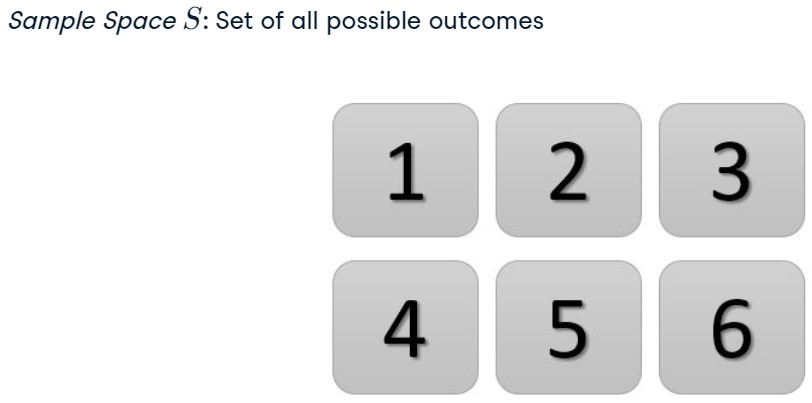

In [1]:
from IPython.display import Image
## Image(illustration_file, height, width)

#### Probability
Given a sample space, probability is a number that helps us understand the likelihood of occurrence of an event within that sample space. It is a number between 0 and 1 - 0 telling us that the event will certainly not occur and 1 telling us that the event will most definitely occur.

$$ 0 \leq P[A] \leq 1$$

The probability of the sample space, or the probability of all events taken together is 1.

Take the example of a coin, you might not know the probability of heads if it is a biased coin, but you can say with certainty that the outcome will be either heads or tails. Thus, we can confidently say that the probability of heads plus the probability of tails equals 1.

$$ P(\text{Head}) + P(\text{Tail}) = 1 $$

#### Mutually Exclusive Events.
Two events, $A$ & $B$, are mutually exclusive if they cannot occur at the same time, then

$$ P[A \cap B] = 0 $$
and
$$ P[A \cup B] = P[A] + P[B] $$

- The probability of two events $A$ & $B$ is the probability of $A$ plus the probability of $B$ minus the probability of $A$ & $B$ occurring together.

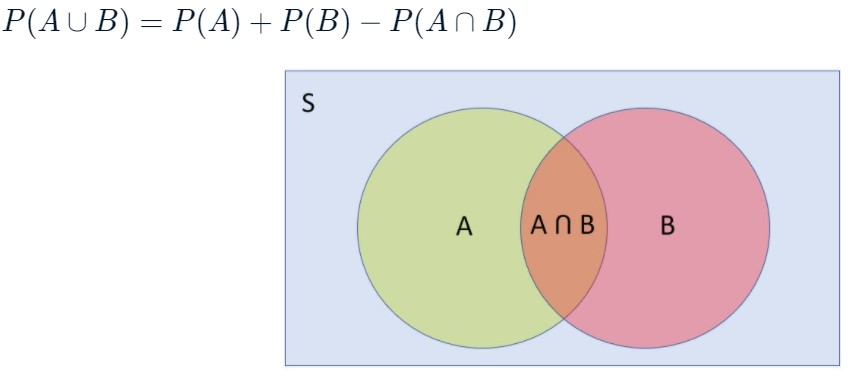

In [2]:
## Image(illustration_file, height, width)

#### Using Simulation for Probability Estimation
Simulations are very helpful in arriving at estimates of probability. Estimating probability typically involves a simple five step process.
- 1) **Construct the sample space** for events which has all possible outcomes 
- 2) **Determine how to simulate** one random **outcome**. 
- 3) **Determine rule for success** - this could involve a combination of events.
- 4) **Sample repeatedly and count successes**.
- 5) **Calculate frequency of success as an estimate of probability**. That's it, you're done! In the next few exercises, you'll see an implementation of these steps.

### 1.2. PRACTICES
#### Exercise 1.2.1. Queen and spade
In this example, you'll use the generalized probability formula 

$$ P[A \cup B] = P[A] + P[B] - P[A \cap B] $$ to calculate the probability of two events. 
Consider a deck of cards (13 cards x 4 suites = 52 cards in total). One card is drawn at random. 

**What is the probability of getting a `queen` or a `spade`?**

Here event $A$ is the card being a `queen` and event $B$ is the card being a `spade`. Think carefully about whether the two events have anything in common.

#### SOLUTION.
We have
$$ P[A] = \dfrac{4}{52}, \qquad P[B] = \dfrac{13}{52}, \quad \text{ and } \quad P[A \cap B] = \dfrac{1}{52} $$
hence
$$ P[A \cup B] = P[A] + P[B] - P[A \cap B] = \dfrac{16}{52}. $$

#### Exercise 1.2.2. Two of a kind
Now let's use simulation to estimate probabilities. Suppose you've been invited to a game of poker at your friend's home. In this variation of the game, you are dealt five cards and the player with the better hand wins. You will use a simulation to estimate the probabilities of getting certain hands.

Let's work on estimating the probability of getting at least two of a kind. Two of a kind is when you get two cards of different suites but having the same numeric value (e.g., 2 of `hearts`, 2 of `spades`, and 3 `other cards`).

By the end of this exercise, you will know how to use simulation to calculate probabilities for card games.
#### SOLUTION

**Step 1. Create sample-space**

In [3]:
deck_of_cards = []
for spade in ['Heart', 'Club', 'Spade', 'Diamond']:
    for k in range(13):
        deck_of_cards.append((spade, k))

#### Step 2. Simulate

In [4]:
# Import numpy alias np
import numpy as np

# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    
    # Deal the hand: In the for loop, shuffle deck_of_cards. 
    np.random.shuffle(deck_of_cards)

    # We then select the first 5 cards as our hand
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for [suite, numeric_value] in hand:
        # Count occurrences of each numeric value
        cards_in_hand[numeric_value] = cards_in_hand.get(numeric_value, 0) + 1
    
    # Condition for getting at least 2 of a kind
    if max(cards_in_hand.values()) >= 2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind = 0.4824 


#### Exercise 1.2.3. Game of thirteen
A famous French mathematician [Pierre Raymond De Montmart](https://www.google.com/search?q=Pierre+Raymond+De+Montmart&rlz=1C1CHBF_enVN924VN924&oq=Pierre+Raymond+De+Montmart&aqs=chrome..69i57j46i19.808j0j7&sourceid=chrome&ie=UTF-8), who was known for his work in combinatorics, proposed a simple game called as [**Game of Thirteen**](https://cardgames.io/thirteen/). 
- You have a deck of 13 cards, each numbered from 1 through 13. 
- Shuffle this deck and draw cards one by one. A coincidence is when the number on the card matches the order in which the card is drawn. For instance, if the 5th card you draw happens to be a 5, it's a coincidence. You win the game if you get through all the cards without any coincidences. Let's calculate the probability of winning at this game using simulation.

By completing this exercise, you will further strengthen your ability to cast abstract problems into the simulation framework for estimating probabilities.

In [5]:
# Pre-set constant variables: deck of 13 cards; number of simulation and coincidences
deck, sims, coincidences = np.arange(1, 14), 10000, 0

# For each drawing, draw all the cards in deck without replacement and assign to draw
for sim in range(sims):
    
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size = 13, replace = False)

    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == 1: 
        coincidences += 1

# Calculate probability of winning: as the fraction of games without any coincidences and use prob_of_winning to print your results.
prob_of_winning = 1 - coincidences / sims
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.37070000000000003


## 2. More probability concepts
Now let's continue building your foundation with some more basic probability concepts.
### 2.1. Theorictic
#### Conditional Probability
- The conditional probability of an event $A$ given event $B$ is defined as the probability of $A$ occurring given that $B$ has already occurred. It's calculated as the probability of $A$ intersection B divided by the probability of $B$.

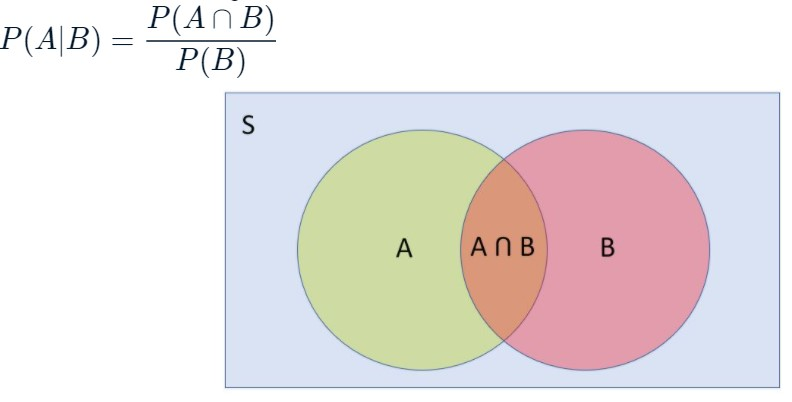

In [6]:
## Image(illustration_file, height, width)

- Similarly, the probability of $B$ given $A$ is the probability of $B$ intersection $A$ divided by probability of $A$,

$$ P[B | A] = \dfrac{P[B \cap A]}{P[A]} $$
- Here we are calculating the probability of $B$ occurring given that $A$ has already occurred. Notice that the numerator in both these cases is identical. If we assume that neither $P(A)$ nor $P(B)$ is zero, then we can easily derive [**Bayes rule**](https://en.wikipedia.org/wiki/Bayes%27_theorem).

#### Bayes rule
Bayes rule, expressed using conditional probabilities is shown in this equation. Although we won't go into much detail, you should know that it is an immensely popular rule for understanding the probability of an event using prior knowledge about factors that might have influenced that event.

$$ P\left[ A_k | B \right] = \dfrac{P\left[ B | A_k \right] P[A_k]}{\displaystyle \sum_{m=1}^n P\left[ B | A_m \right] P[A_m] } $$

#### Independent Events
Independent events are events where the probability of one occurring is independent of the probability of the other. This is expressed mathematically as the probability of $A$ intersection $B$ equals the product of the marginal probabilities of $A$ and $B$. 

$$ P[A \cap B] = P[A] \cdot P[B], \quad \forall A, B \text{ be independent} $$
hence

$$ P[A | B] = \dfrac{P[A \cap B]}{P[B]} = P[A] $$
Consider two tosses of a coin. 
- Seeing heads on the first toss is independent of seeing heads on the second toss. 
- However, seeing heads on the first toss is not independent of seeing two heads in a row.
- One nice outcome is that for independent events $A$ and $B$, the conditional probability of event $A$ given event $B$ is the same as the marginal probability of event $A$.

Let's work through a simple example.
#### Solar Panels & Clean Vehicles
Consider a neighborhood with 150 houses. You're given data regarding whether or not each house has solar panels installed and whether or not the owners have a clean vehicle - hybrid or an electric car. We want to find the probability of having solar panels conditional on the owners having a hybrid or an electric car. 
- We first need to calculate the marginal probabilities. The marginal probability of solar panels is sum of probabilities of solar with and without a clean vehicle, which is 40 divided by 150.
- Similarly we can calculate the other marginal probabilities. The marginal probabilities have been calculated in the outermost row and column. Take some time to make sure you understand how they are calculated.
- Finally, we want the probability of solar panels conditional on owners having a clean vehicle. Looking at the formula, the numerator is 30 divided by 150 and the denominator is 80 divided by 150, giving us an answer of 0.375.

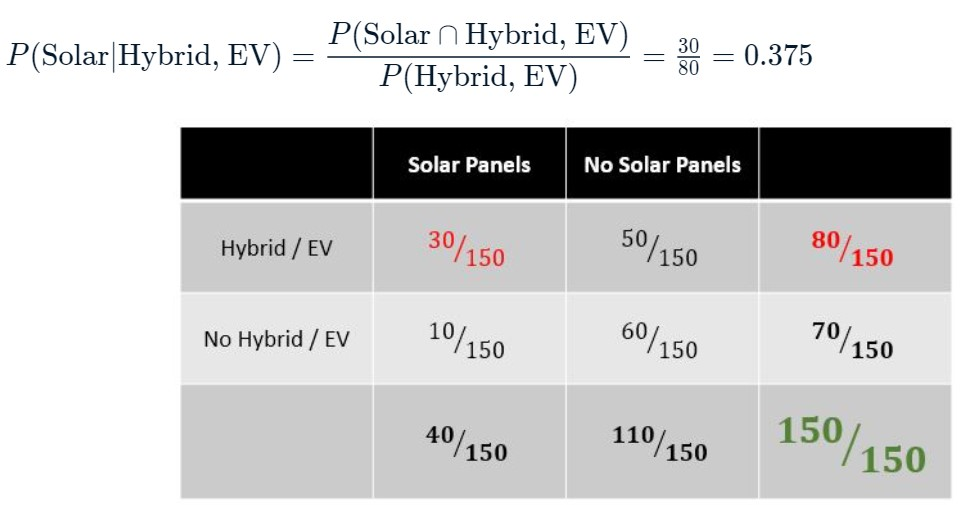

In [7]:
## Image(illustration_file, height, width)

 Try to work out the probability of having a solar panel without owning a clean vehicle and see if your answer is 1 divided by 7.
 
### 2.2. PRACTICES.
#### Exercise 2.2.1. The conditional urn
As we've learned, conditional probability is defined as the probability of an event given another event. To illustrate this concept, let's turn to an urn problem.

We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.
#### SOLUTION.

In [8]:
# Initialize success :0, simssims: 5000 and urn: list of 7 white balls ('w') and 6 black balls ('b').
success, sims = 0, 5000
urn = 7*['w'] + 6*['b']

for i in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace = False, size = 4)
    
    # Count the number of successes 
    # Check to see if the first and third are white and second and fourth are black.
    if (draw == ['w', 'b', 'w', 'b']).all(): 
        success += 1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.0744


#### Exercise 2.2.2. Birthday problem
Now we'll use simulation to solve a famous probability puzzle - the birthday problem. It sounds quite straightforward - *`How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?`*

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem.
#### SOLUTION.
**Step 1.** Define the function `birthday_sim` for simulation birthday-problem.

In [9]:
# Draw a sample of birthdays & check if each birthday is unique
days = list(range(1, 366))
people = 2

# Define a function birthday_sim() that takes one input people
def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for size in range(sims):

        # Set size of draw to number of people.
        draw = np.random.choice(days, size = people, replace=True)
        
        # check if there be at least two share the same birthday.
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims

    # returns the probability that at least two share the same birthday.
    return out

**Step 2.** Call `birthday_sim()` in a `while loop` and `break` when the probability is greater than 0.5.

In [10]:
# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


#### Exercise 2.2.3. Full house
Let's return to our poker game. Last time, we calculated the probability of getting at least two of a kind. This time we are interested in a full house.

- A full house is when you get two cards of different suits that share the same numeric value and three other cards that have the same numeric value (e.g., 2 of `hearts` & `spades`, `jacks of clubs`, `diamonds`, & `spades`).
- Thus, a full house is the probability of getting exactly three of a kind conditional on getting exactly two of a kind of another value. Using the same code as before, modify the success condition to get the desired output.

This exercise will teach you to estimate conditional probabilities in card games and build your foundation in framing abstract problems for simulation.

#### SOLUTION.

In [11]:
deck_of_cards = []
for spade in ['Heart', 'Club', 'Spade', 'Diamond']:
    for k in range(13):
        deck_of_cards.append((spade, k))

In [12]:
n_sims, full_house = 50000, 0

# Simulate
for i in range(n_sims):

    # Shuffle deck & count card occurrences in the hand
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    # Condition for getting full house: (2 of one kind, 3 of the other)
    condition = (max(cards_in_hand.values()) ==3) & (min(cards_in_hand.values())==2)
    if condition: 
        full_house += 1
print("Probability of seeing a full house = {}".format(full_house/n_sims))

Probability of seeing a full house = 0.00154


## 3. Data generating process
### 3.1. Simulation theory.
#### Simulation Steps
In the [last chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Sampling%20%26%20Resampling/Resampling/introduction-randomness-simulations.ipynb), we went over the steps required to run a simulation. Here we will zoom in on the first three steps - 
- 1) Defining random variables,
- 2) Assign probabilities and 
- 3) Define relationships (between rvs) - which together help you set up the statistical model. 

But first, let's see how to choose which random variables to define. In essence, we need to think about how the data will be generated - defining the data generating process.

####  Data Generating Process (DGP)
When I start thinking about casting a problem in the simulation framework, the data generating process, or DGP, is usually my first task.
- When designing the statistical model, you want to start by thinking about **what factors influence the data** followed by the **sources of uncertainty**.
- Once you have that quantified, think about the **relationship between these factors**. You will typically iterate a few times before finalizing the DGP. Designing the DGP is as much an art as it is a science, but with practice, it gets easier over time.

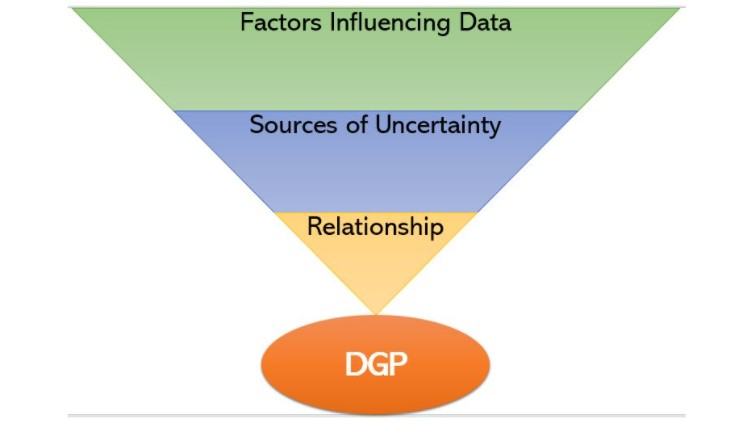

In [13]:
## Image(illustration_file, height, width)

#### Example. Cricket
Next, let's look at a very simple example. Suppose you're trying to model the outcome of a cricket match between two highly competitive teams today 

- India and England. Let's try to model the DGP.
- The outcome of the match could be influenced by multiple variables:

> - 1) the weather - how cloudy or sunny is it?
> - 2) The location - is it in India? England? Or a neutral location?
> - 3) The pitch conditions - does the central strip of the cricket field favor either team?
> - 4) Recent form - how have the teams been faring of late? And
> - 5) player morale.

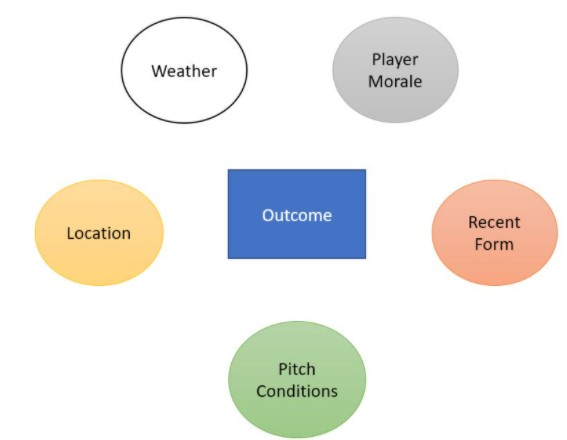

In [14]:
## Image(illustration_file, height, width)

- For uncertainty. 

> - The weather and morale are quite uncertain and random.
> - The location is usually pre-determined.
> - There is some variation in the pitch condition, typically to favor the home team. Recent form is known, but certainly varies from game to game.

### 3.2. PRACTICES
#### Exercise 3.2.1. Driving test
Through the next exercises, we will learn how to build a `data generating process (DGP)` through progressively complex examples.

In this exercise, you will simulate a very simple DGP. Suppose that you are about to take a driving test tomorrow. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

This is a simple problem and can be solved analytically. Here, you will learn how to model a simple DGP and see how it can be used for simulation.


#### SOLUTION.
**Step 1.** Write a function `test_outcome()`

In [15]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):
    
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p = [ p_rain, 1 - p_rain])
    
    # Simulate and return whether you will pass or fail
    test_result = np.random.choice(['pass', 'fail'], 
                                   p = [ p_pass[weather], 1 - p_pass[weather] ] )
    
    # return the outcome
    return test_result

**Step 2.** Compute the probability of passing the test.

In [16]:
for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_outcomes_frac = sum([x == 'pass' for x in outcomes])/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_outcomes_frac))

Probability of Passing the driving test = 0.68


#### Exercise 3.2.2. National elections
This exercise will give you a taste of how you can model a `DGP` at different levels of complexity.

Consider national elections in a country with two political parties - `Red` and `Blue`. This country has 50 states and the party that wins the most states wins the elections.

You have the probability $p$ of *`Red winning in each individual state and want to know the probability of Red winning nationally`*.

Let's model the DGP to understand the distribution. Suppose the election outcome in each state follows a *`binomial distribution with probability  such that  indicates a loss for Red and  indicates a win`*. 

We then simulate a number of election outcomes. Finally, we can ask rich questions like what is the probability of Red winning less than 45% of the states?

#### SOLUTION.

In [17]:
# Generate probs p of "Red winning"
p = [np.random.uniform(0,1) for _ in range(50)]

# Intialize outcomes
outcomes, sims, probs = [], 1000, p

for _ in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(p = probs, n=1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = sum([(x < 0.45) for x in outcomes])/len(outcomes)
print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.094


#### Exercise 2.2.3. Fitness goals
Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a `Poisson random variable` with a mean $\lambda$  dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this information, find the probability of losing weight in a month.

In [18]:
# Initialize
outcomes, sims, days = [], 1000, 30

# Simulate steps & choose prob 
for _ in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        
        # Simulate "steps" as a Poisson random variable for a given day based on the value of "lam"
        steps = np.random.poisson(lam)

        if steps > 10000: 
            prob = [0.2, 0.8]   # Set prob to [0.2, 0.8] if steps > 10000
        elif steps < 8000: 
            prob = [0.8, 0.2]   # and if step < 8000
        else:
            prob = [0.5, 0.5]   # Otherwise
        
        # Sum up all the weight lost or gained in a month stored in w    
        w.append(np.random.choice([1, -1], p=prob))

    # Then append after each iteration    
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = sum([(x < 0) for x in outcomes]) / len(outcomes)
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.174


## 4. eCommerce Ad Simulation
Here you will be bringing together everything you have learned so far to build a sophisticated ecommerce ad simulation. By the end of this section, you will learn how to model a complex DGP by breaking it down into simpler parts. You will then use the statistical model to estimate probabilities.
### 4.1. Theorictic
#### eCommerce Funnel
Consider a typical ecommerce web funnel. Ads are shown on different websites. Some potential customers click on the ads and may signup. After signing up, they might end up purchasing something on the website. Given this DGP, let's build the underlying statistical model. We'll first focus on the flow till signup and later work on the purchase flow

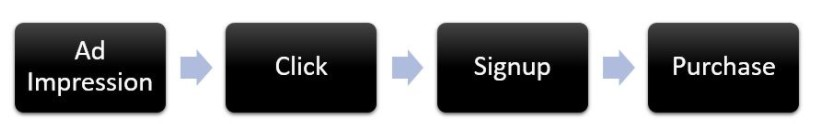

In [19]:
## Image(illustration_file, height, width)

#### Signup Flow
For the signup flow, the number of ad impressions you get is a count variable. This is typically modeled using a Poisson random variable. We can assume that the rate parameter of the `Poisson random` variable follows a **`normal distribution`**, but again you can choose any reasonable continuous distribution. After an ad impression, a customer has a `binary decision` - to click or not to click.
- `Binary decisions` are best modeled using the binomial random variables. But a binomial random variable requires a rate of success. We can pass in a historical clickthrough rate or go a step further and have a distribution on the clickthrough rates.
- Similarly, after clicking an ad, signup is a binary decision, which can be modeled using a binomial `RV`. Here the rate of success is the signup rate. As you can see, you can be remarkably flexible in how you define the data generating process. Next, let's look at the purchase flow.

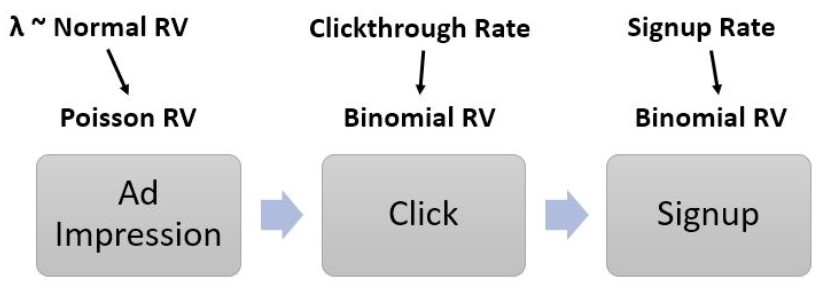

In [20]:
## Image(illustration_file, height, width)

#### Purchase Flow
As a final step, let's construct the purchase flow.
- For each signup, the decision to purchase or not is again binary and can be modeled by a binomial random variable governed by a purchase rate. Now if a purchase occurs, we want to know the value of that purchase.
- Purchase value is typically a positive real number and can be modeled by any continuous random variable. Here I choose the exponential random variable governed by a historical average purchase value. 

In the next few exercises, you will build this entire flow using numpy. You will then simulate outcomes and calculate probabilities. The exercises in this section might seem daunting and stretch you a bit, but these concepts form the foundations of any data generating process and simulation, so they are worth learning. I've personally utilized such flows countless times in my own work.

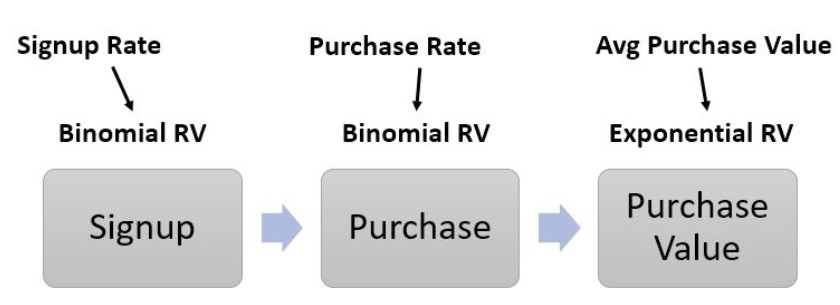

In [21]:
## Image(illustration_file, height, width)

### 4.2. PRACTICES
#### Exercise 4.2.1. Sign up Flow
We will now model the DGP of an eCommerce ad flow starting with sign-ups.

On any day, we get many ad impressions, which can be modeled as `Poisson` random variables (RV). You are told that  is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability  of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform `RV`.

In [22]:
# Initialize click-through rate and signup rate dictionaries
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
   
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam=lam) # Model impressions as a Poisson random variable with a mean value lam.
    clicks = np.random.binomial(impressions, p=ct_rate[cost]) # Model clicks and signups as binomial random variables with n as impressions and clicks and p as ct_rate[cost] 
    signups = np.random.binomial(clicks, p=su_rate[cost]) # and p as su_rate[cost]
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [246]


#### Exercise 4.2.2. Purchase Flow
After signups, let's model the revenue generation process. Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around `$1000`. We use this information to create the purchase_values RV. The revenue, then, is simply the sum of all purchase values.

The variables `ct_rate`, `su_rate` and the function `get_signups()` from the last exercise are pre-loaded for you.

In [23]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size=purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $19788.227707152106


#### Exercise 4.2.3. Probability of losing money
In this exercise, we will use the DGP model to estimate probability.

As seen earlier, this company has the option of spending extra money, let's say `$3000`, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra `$3000` by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

Once we have simulated revenue outcomes, we can ask a rich set of questions that might not have been accessible using traditional analytical methods.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.

In [24]:
# Initialize cost_diff: the difference between the 'high' and 'low' cost options, to 3000
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = sum([(rev_high[k] - rev_low[k] < cost_diff) for k in range(sims)]) / sims
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.4738
